# Agriculture Artificial Neural Network

## Imports

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Import Data from excel

In [ ]:
file_path = 'balanced_data.xlsx'
df = pd.read_excel(file_path)

In [ ]:
df.head()

,Unnamed: 0,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,rain_intensity,nitrogen_expectation,phosphorus_expectation,potassium_expectation,water_expectation
0,0,2,3,6,1,1,1,1,3,7,1
1,1,7,0,9,5,5,2,3,4,6,4
2,2,3,4,6,0,3,0,2,4,6,1
3,3,5,6,5,5,0,3,3,5,8,3
4,4,0,3,6,4,5,2,3,4,6,4


## Splitting the Data

In [ ]:
features = df.columns[1:7]
X = torch.tensor(df[features].values, dtype=torch.float32)
y = torch.tensor(df[df.columns[7:]].values, dtype=torch.float32)



In [ ]:
X

tensor([[ 2.,  3.,  6.,  1.,  1.,  1.],
        [ 7.,  0.,  9.,  5.,  5.,  2.],
        [ 3.,  4.,  6.,  0.,  3.,  0.],
        ...,
        [ 7., 10.,  8.,  3.,  1.,  3.],
        [ 2.,  5.,  4.,  4.,  1.,  3.],
        [ 0.,  0.,  7.,  0.,  2.,  0.]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creating the Neural Network

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(len(features), 32)
        self.layer2 = nn.Linear(32, 32)
        self.output = nn.Linear(32, 4)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        return self.output(x)

## Compile Network

In [ ]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (layer1): Linear(in_features=6, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=4, bias=True)
)


# Loading the Data

In [ ]:
# Create a TensorDataset
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)

# Create a DataLoader with the specified batch size
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=20, shuffle=True)

## Loss and optimizer


In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

## Training loop


In [ ]:
epochs = 100
losses = []
avg_losses = []
for epoch in range(epochs):
    model.train()
    for inputs, targets in train_loader:  # Iterate over batches
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    print(f'Epoch {epoch+1}, Average Loss: {sum(losses) / len(losses)}')
    avg_losses.append(sum(losses) / len(losses))

Epoch 1, Average Loss: 1.8261979362543892
Epoch 2, Average Loss: 1.2925112916558397
Epoch 3, Average Loss: 1.0832746231478023
Epoch 4, Average Loss: 0.9575376257884736
Epoch 5, Average Loss: 0.8734548703128217
Epoch 6, Average Loss: 0.8089328293317284
Epoch 7, Average Loss: 0.7618814940546074
Epoch 8, Average Loss: 0.7264448042374616
Epoch 9, Average Loss: 0.6968312558265553
Epoch 10, Average Loss: 0.6742121596254554
Epoch 11, Average Loss: 0.6548359379464505
Epoch 12, Average Loss: 0.6402091003857018
Epoch 13, Average Loss: 0.625925508042626
Epoch 14, Average Loss: 0.6137222025533017
Epoch 15, Average Loss: 0.6023623125810249
Epoch 16, Average Loss: 0.5951992235347336
Epoch 17, Average Loss: 0.586484673337403
Epoch 18, Average Loss: 0.5785917661158867
Epoch 19, Average Loss: 0.5726930140234122
Epoch 20, Average Loss: 0.5656314168636706
Epoch 21, Average Loss: 0.5588463871669369
Epoch 22, Average Loss: 0.553489516285014
Epoch 23, Average Loss: 0.5490306560950511
Epoch 24, Average Loss:


## Plotting the loss over epochs

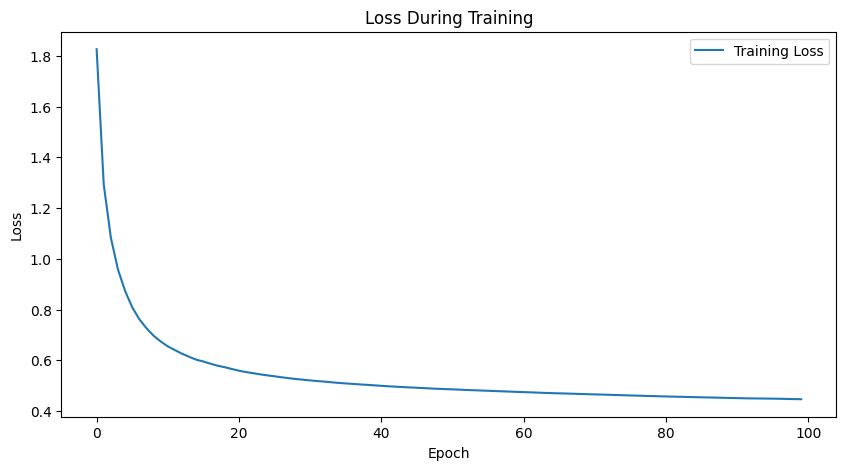

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(avg_losses, label='Training Loss')
plt.title('Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.eval()

# Forward pass to obtain predictions
with torch.no_grad():
    predictions = model(X_test)

In [ ]:
predictions

tensor([[1.1200, 4.0250, 7.9421, 3.2367],
        [1.2327, 3.7492, 5.7081, 1.1165],
        [3.1896, 4.4482, 7.9850, 3.7554],
        ...,
        [3.0202, 4.3292, 7.7901, 4.1068],
        [1.0308, 3.8558, 5.9856, 1.0159],
        [2.4062, 4.3787, 6.5496, 1.8906]])

In [ ]:
y_test

tensor([[1., 5., 6., 3.],
        [1., 4., 5., 1.],
        [3., 5., 7., 4.],
        ...,
        [3., 5., 6., 4.],
        [1., 3., 6., 1.],
        [2., 4., 5., 2.]])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, predictions)


In [ ]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 0.4413381
Mean Squared Error (MSE): 0.4186964
Root Mean Squared Error (RMSE): 0.64706755
R-squared (R2) Score: 0.6585907735313933


# Saving the Model

In [ ]:
# Save the model
torch.save(model.state_dict(), 'model2.pth')

# ONNX Export

In [ ]:
!pip install -q onnx onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.4 MB/s eta 0:00:00


In [ ]:
import torch.onnx

# Input to the model
dummy_input = torch.randn(1, 6)

# Export the model
torch.onnx.export(model, dummy_input, 'model_b1.onnx', input_names = ['input'], output_names = ['output'])


# ONNX Inference

In [ ]:
import onnx
onnx_model = onnx.load("model_b1.onnx")
onnx.checker.check_model(onnx_model)

In [ ]:
import onnxruntime as ort

# Load the ONNX model
onnx_model_path = 'model_b1.onnx'
ort_session = ort.InferenceSession(onnx_model_path)

test_data = [
    [
        [1, 9, 8, 2, 1, 1],
        [1, 5, 6, 3]
    ]
]

# Extract input data
x, y = np.array(test_data[0][0], dtype=np.float32), np.array(test_data[0][1], dtype=np.float32)
x = np.expand_dims(x, axis=0)  # Add batch dimension

# x, y = test_data[0][0], test_data[0][1]
ort_sess = ort.InferenceSession('model_b1.onnx')
outputs = ort_sess.run(None, {'input': x})


# # Print Result
# predicted, actual = classes[outputs[0][0].argmax(0)], classes[y]
# print(f'Predicted: "{predicted}", Actual: "{actual}"')

In [ ]:
outputs

[array([[1.1725955, 3.875077 , 6.0841513, 1.1079917]], dtype=float32)]